# __Vanilla Autoencoder with PyTorch__

In [1]:
# For auto saving and applying changes to modified files.
%load_ext autoreload
%autoreload 2

In [2]:
# Prepare Packages
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import sampler
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.transforms import ToTensor
from utilities.utils import *

In [7]:
# Prepare dataset
'''
    TRAIN_MNIST & TEST_MNIST are objects of type (or instances of) 
    `torchvision.datasets.MNIST`.
    
    Running `print(TRAIN_MNIST)` will print out all the information
    about the dataset: Number of datapoints, root location, etc.
    
    TRAIN_MNIST[i] is a tuple (xi, yi) where i is the ith
    datapoint, xi is a tensor, and yi is an integer label/class 
    of xi. Same concept applies to VAL_MNIST[i] & TEST_MNIST[i].
'''

# Declare necessary constants
USE_GPU = True
DTYPE = torch.float32
PATH = "./dataset"
    
transform = T.Compose(
    [
        T.ToTensor(),
        T.Resize(28)
    ]
)

TRAIN_MNIST = datasets.MNIST(
    root=PATH,
    train=True,
    download=True,
    transform=transform
)

VAL_MNIST = datasets.MNIST(
    root=PATH,
    train=True,
    download=True,
    transform=transform
)

TEST_MNIST = datasets.MNIST(
    root=PATH,
    train=False,
    download=True,
    transform=transform
)

num_workers = get_optimal_num_workers(TRAIN_MNIST, VERBOSE=False)

# Specify if use gpu and multiprocessors for training.
if USE_GPU and torch.cuda.is_available():
    DEVICE = torch.device('cuda')
    kwargs = {'num_workers': num_workers, 'pin_memory': True}
else:
    DEVICE = torch.device('cpu')
    kwargs = {}
    
# Prepare dataloaders
NUM_TRAIN = 50000

loader_TRAIN = DataLoader(TRAIN_MNIST, batch_size=64,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)),
                          **kwargs)
loader_VAL = DataLoader(VAL_MNIST, batch_size=64,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(TRAIN_MNIST))),
                        **kwargs)
loader_TEST = DataLoader(TEST_MNIST, batch_size=64,
                         **kwargs)

Finding the best number of workers for dataloader...

Best mumber of workers for DataLoader is 10             
with time taken 5.257, about 9.968 faster             
than the slowest number of workers (2).


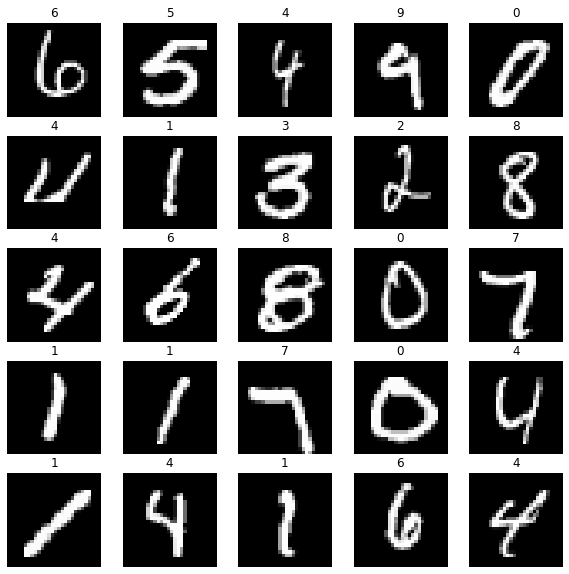

In [4]:
visualize_dataset(TRAIN_MNIST, type(TRAIN_MNIST))